In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='3e65fa84-a8e7-4d60-a783-a3e5e01d3e4b', project_access_token='p-162a1a0aa094f13bd28306ef41c6e522709fb436')
pc = project.project_context


# Coursera Capstone
# Rosany Antonyvincent
## Road accident severity in Seattle

In [9]:
import types
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b6d12709eeba4516b4cd2f943470761c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vm3civbmsagisEYYDPh7tTlASWHPByaPtGAotNo895LC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b6d12709eeba4516b4cd2f943470761c.get_object(Bucket='courseracapstone-donotdelete-pr-yxurjm5ryg7f5p',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [ ]:
df.count()

In [ ]:
df.dtypes

In [ ]:
# Quick check to see if there are any duplicates in INCKEY attribute
boolean = not df["INCKEY"].is_unique      # True (credit to @Carsten)
boolean = df['INCKEY'].duplicated().any() # True
boolean

In [ ]:
# Same check on OBJECTID
boolean = not df["OBJECTID"].is_unique      # True (credit to @Carsten)
boolean = df['OBJECTID'].duplicated().any() # True
boolean

## Data cleaning/ new dataframes

### Date

In [10]:
day_of_year_list = []
day_list = []
month_list = []
date1 = pd.to_datetime(df['INCDATE'])
for n in range(len(date1)):
    date = date1.iloc[n]
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1, tz ='UTC')
    day_of_year_list.append((date - new_year_day).days + 1)
    day = date.strftime('%a')
    day_list.append((day))
    month = date.strftime('%b')
    month_list.append((month))
df['DAY_OF_YEAR'] = day_of_year_list
df['DAY'] = day_list
df['MONTH'] = month_list

# Clear up the date and time format as it is not consistent throughout the column. Remove any rows missing date and time
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['DATE'] = df['INCDTTM'].dt.strftime('%d/%m/%Y')

df_date = df[['OBJECTID','SEVERITYCODE','PERSONCOUNT','VEHCOUNT','DATE']]
df['YEAR'] = df_date['DATE'].str[-4:].astype(int)
df_date = df[['OBJECTID','SEVERITYCODE','PERSONCOUNT','VEHCOUNT','DATE','YEAR','DAY_OF_YEAR','DAY','MONTH']]
df_date

,OBJECTID,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,DATE,YEAR,DAY_OF_YEAR,DAY,MONTH
0,1,2,2,2,27/03/2013,2013,86,Wed,Mar
1,2,1,2,2,20/12/2006,2006,354,Wed,Dec
2,3,1,4,3,18/11/2004,2004,323,Thu,Nov
3,4,1,3,3,29/03/2013,2013,88,Fri,Mar
4,5,2,2,2,28/01/2004,2004,28,Wed,Jan
5,6,1,2,2,20/04/2019,2019,110,Sat,Apr
6,7,1,2,2,09/12/2008,2008,344,Tue,Dec
7,9,2,3,1,15/04/2020,2020,106,Wed,Apr
8,10,1,2,2,15/06/2006,2006,166,Thu,Jun
9,12,2,2,2,20/03/2006,2006,79,Mon,Mar


### Time

In [11]:
# Clear up the date and time format as it is not consistent throughout the column. Remove any rows missing date and time
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['TIME'] = df['INCDTTM'].dt.strftime('%H:%M:%S')
df_time = df[['OBJECTID','SEVERITYCODE','ADDRTYPE','LOCATION','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','TIME']]
# strftime has added midnight time to cells which didn't have a time so these need to be removed
# First I checked on excel to see if any cells have accidents at midnight
# zero were found
df_time['TIME'] = df.TIME.replace('00:00:00',np.nan) #replace midnight values with NaN
df_time = df_time.dropna(subset=['TIME']) #drop all rows with NaN
df_time['TIME'].astype(str)
df_time['HOUR'] = df_time['TIME'].str[:2].astype(int)
df_time['YEAR'] = df_date['YEAR']
df_time['DAY_OF_YEAR'] = df_date['DAY_OF_YEAR']
df_time

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,OBJECTID,SEVERITYCODE,ADDRTYPE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,TIME,HOUR,YEAR,DAY_OF_YEAR
0,1,2,Intersection,5TH AVE NE AND NE 103RD ST,2,0,0,2,14:54:00,14,2013,86
1,2,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,0,0,2,18:55:00,18,2006,354
2,3,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,0,0,3,10:20:00,10,2004,323
3,4,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,0,0,3,09:26:00,9,2013,88
4,5,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,0,0,2,08:04:00,8,2004,28
5,6,1,Intersection,24TH AVE NW AND NW 85TH ST,2,0,0,2,17:42:00,17,2019,110
7,9,2,Intersection,BROADWAY AND E PIKE ST,3,0,1,1,17:47:00,17,2020,106
8,10,1,Block,PINE ST BETWEEN 5TH AVE AND 6TH AVE,2,0,0,2,13:00:00,13,2006,166
9,12,2,Intersection,41ST AVE SW AND SW THISTLE ST,2,0,0,2,15:49:00,15,2006,79
10,14,1,Alley,NaN,2,0,0,2,18:20:00,18,2006,145


In [ ]:
df_time.dtypes

### One hot encoding

In [4]:
!pip install tqdm
from tqdm import tqdm
import calendar as cal
# Create new dataframe
df_feature = df[['OBJECTID','WEATHER','LIGHTCOND','ROADCOND','SEVERITYCODE','X','Y']]
df_feature = pd.merge(df_feature,
                 df_date[['YEAR', 'DAY', 'MONTH','OBJECTID']],
                 on='OBJECTID')

# Drop missing values
df_feature = df_feature.dropna(subset=['WEATHER','LIGHTCOND','ROADCOND','X','Y'])

# Drop rows with 'Unknown' or 'Other'

for n in ['WEATHER','LIGHTCOND','ROADCOND']:
    a = np.where(df_feature[n] == 'Unknown')[0]
    df_feature = df_feature.drop(df_feature.index[a])
    b = np.where(df_feature[n] == 'Other')[0]
    df_feature = df_feature.drop(df_feature.index[b])
    
    
# Create boolean columns
df_feature = pd.concat([df_feature,pd.get_dummies(df_feature['LIGHTCOND'])], axis=1)
df_feature['Dark'] = df_feature['Dark - No Street Lights'] + df_feature['Dark - Street Lights Off'] + df_feature['Dark - Unknown Lighting'] + df_feature['Dark - Street Lights On'] #dark
df_feature['Dawn'] = df_feature['Dawn'] + df_feature['Dusk'] #same type of light
df_feature.drop(['Dusk','Dark - No Street Lights','Dark - Unknown Lighting','Dark - Street Lights On','Dark - Street Lights Off'], axis = 1, inplace=True)

df_feature = pd.concat([df_feature,pd.get_dummies(df_feature['WEATHER'])],axis=1)
df_feature['Cloudy'] = df_feature['Fog/Smog/Smoke'] + df_feature['Partly Cloudy'] + df_feature['Blowing Sand/Dirt'] + df_feature['Overcast'] #vision obstructors
df_feature['Rain/Snow'] = df_feature['Raining'] + df_feature['Sleet/Hail/Freezing Rain'] + df_feature['Snowing'] + df_feature['Severe Crosswind'] #surface/steering obstructors
df_feature.drop(['Fog/Smog/Smoke','Partly Cloudy','Blowing Sand/Dirt','Overcast','Raining','Sleet/Hail/Freezing Rain','Snowing','Severe Crosswind'], axis=1,inplace=True)

df_feature = pd.concat([df_feature,pd.get_dummies(df_feature['ROADCOND'])], axis=1)
df_feature['Wet'] = df_feature['Standing Water'] + df_feature['Wet'] + df_feature['Snow/Slush'] + df_feature['Oil'] + df_feature['Sand/Mud/Dirt'] +df_feature['Ice'] #Non-dry surface
df_feature.drop(['Standing Water','Snow/Slush','Oil','Sand/Mud/Dirt','Ice'],axis=1,inplace=True)

#convert day and month to float format (numbers)
a = len(df_feature['OBJECTID'])
DAY_NU = np.zeros(a)
MONTH_NU = np.zeros(a)
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for n in tqdm(range(a)):
    DAY_NU[n] = ((days.index(df_feature['DAY'].iloc[n])) + 1)
    MONTH_NU[n] = (months.index((df_feature['MONTH'].iloc[n])) + 1)   
            
    
df_feature['DAY_NU'] = DAY_NU
df_feature['MONTH_NU'] = MONTH_NU

df_feature = df_feature.drop(columns=['WEATHER','ROADCOND','LIGHTCOND','DAY', 'MONTH'])
df_feature

100%|██████████| 166217/166217 [00:04<00:00, 40017.14it/s]


,OBJECTID,SEVERITYCODE,X,Y,YEAR,Dawn,Daylight,Dark,Clear,Cloudy,Rain/Snow,Dry,Wet,DAY_NU,MONTH_NU
0,1,2,-122.323148,47.703140,2013,0,1,0,0,1,0,0,1,3.0,3.0
1,2,1,-122.347294,47.647172,2006,0,0,1,0,0,1,0,1,3.0,12.0
2,3,1,-122.334540,47.607871,2004,0,1,0,0,1,0,1,0,4.0,11.0
3,4,1,-122.334803,47.604803,2013,0,1,0,1,0,0,1,0,5.0,3.0
4,5,2,-122.306426,47.545739,2004,0,1,0,0,0,1,0,1,3.0,1.0
5,6,1,-122.387598,47.690575,2019,0,1,0,1,0,0,1,0,6.0,4.0
6,7,1,-122.338485,47.618534,2008,0,1,0,0,0,1,0,1,2.0,12.0
7,9,2,-122.320780,47.614076,2020,0,1,0,1,0,0,1,0,3.0,4.0
8,10,1,-122.335930,47.611904,2006,0,1,0,1,0,0,1,0,4.0,6.0
9,12,2,-122.384700,47.528475,2006,0,1,0,1,0,0,1,0,1.0,3.0


In [ ]:
# Check for missing values
len(df_feature) - df_feature.count()

## Generating map

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [8]:
import folium
seattle_latitude = 47.608013
seattle_longitude = -122.335167
# create map and display it
seattle_map = folium.Map(location=[seattle_latitude, seattle_longitude], zoom_start=12)

limit = 100
df_feature = df_feature.iloc[0:limit, :]
OBJECTID = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the map
for X, Y, SEVERITYCODE in zip(df_feature.Y, df_feature.X, df_feature.SEVERITYCODE):
    folium.features.CircleMarker(
        [X, Y],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=str(SEVERITYCODE),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(seattle_map)

# show map
seattle_map

## Data analysis

### Date

### per year

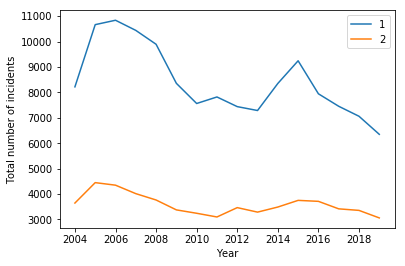

In [48]:
# Total incidents across years
year_array = np.zeros((16,2))

b = 0
for a in range(2004,2020):

    for m in [1,2]:        
        year_array[b,m-1] = (np.sum((df_date['YEAR']== a) & (df_date['SEVERITYCODE'] == m)))
    b = b + 1
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))
x=np.arange(2004,2020)

plt.plot(x,year_array)
plt.xlabel('Year')
plt.ylabel('Total number of incidents')
plt.legend(['1','2'],loc=1)
plt.show() 

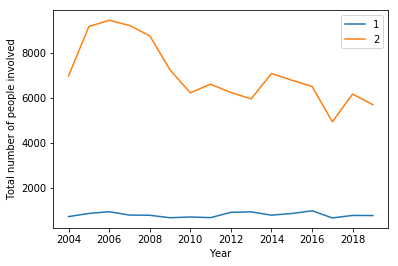

In [37]:
# Total people involved across years
year_array = np.zeros((16,2))

b = 0
for a in range(2004,2020):

    for m in [1,2]:        
        year_array[b,m-1] = (np.sum((df_date['YEAR']== a) & (df_date['PERSONCOUNT'] == m)))
    b = b + 1
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))
x=np.arange(2004,2020)

plt.plot(x,year_array)
plt.xlabel('Year')
plt.ylabel('Total number of people involved')
plt.legend(['1','2'],loc=1)
plt.show() 

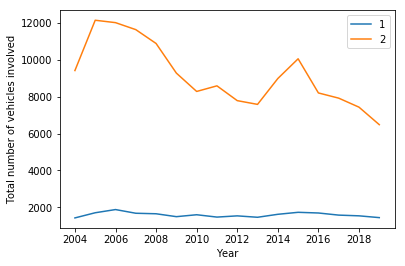

In [36]:
# Total vehicles involved across years
year_array = np.zeros((16,2))

b = 0
for a in range(2004,2020):

    for m in [1,2]:        
        year_array[b,m-1] = (np.sum((df_date['YEAR']== a) & (df_date['VEHCOUNT'] == m)))
    b = b + 1
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))
x=np.arange(2004,2020)

plt.plot(x,year_array)
plt.xlabel('Year')
plt.ylabel('Total number of vehicles involved')
plt.legend(['1','2'],loc=1)
plt.show() 

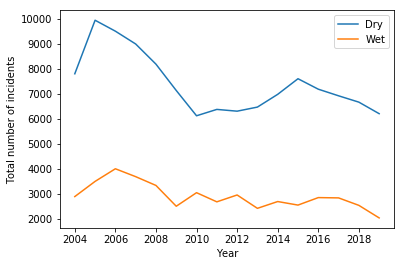

In [51]:
# Total incidents with road conditions across years
year_array = np.zeros((16,2))

b = 0
for a in range(2004,2020):            
        year_array[b,0] = (np.sum((df_feature['YEAR']== a) & (df_feature['Dry'] == 1)))
        year_array[b,1] = (np.sum((df_feature['YEAR']== a) & (df_feature['Wet'] == 1)))       
        b = b + 1
plt.figure()


x=np.arange(2004,2020)

plt.plot(x,year_array)
plt.xlabel('Year')
plt.ylabel('Total number of incidents')
plt.legend(['Dry','Wet'],loc=1)
plt.show()


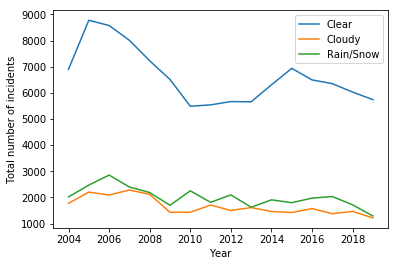

In [49]:
# Total incidents with weather conditions across years
year_array = np.zeros((16,3))

b = 0
for a in range(2004,2020):            
        year_array[b,0] = (np.sum((df_feature['YEAR']== a) & (df_feature['Clear'] == 1)))
        year_array[b,1] = (np.sum((df_feature['YEAR']== a) & (df_feature['Cloudy'] == 1)))
        year_array[b,2] = (np.sum((df_feature['YEAR']== a) & (df_feature['Rain/Snow'] == 1)))
        b = b + 1
plt.figure()

x=np.arange(2004,2020)

plt.plot(x,year_array)
plt.xlabel('Year')
plt.ylabel('Total number of incidents')
plt.legend(['Clear','Cloudy','Rain/Snow'],loc=1)
plt.show()

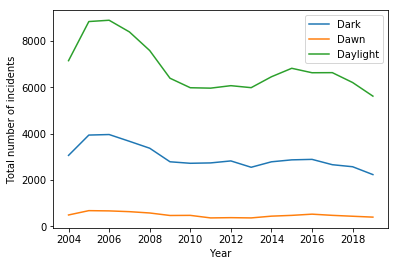

In [47]:
# Total incidents with light conditions across years
year_array = np.zeros((16,3))

b = 0
for a in range(2004,2020):            
        year_array[b,0] = (np.sum((df_feature['YEAR']== a) & (df_feature['Dark'] == 1)))
        year_array[b,1] = (np.sum((df_feature['YEAR']== a) & (df_feature['Dawn'] == 1)))
        year_array[b,2] = (np.sum((df_feature['YEAR']== a) & (df_feature['Daylight'] == 1)))
        b = b + 1
plt.figure()

x=np.arange(2004,2020)

plt.plot(x,year_array)
plt.xlabel('Year')
plt.ylabel('Total number of incidents')
plt.legend(['Dark','Dawn','Daylight'],loc=1)
plt.show()

### per month

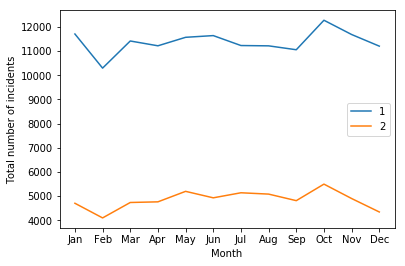

In [34]:
# Total incidents across months
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_array = np.zeros((12,2))

b = 0
for a in months:

    for m in [1,2]:        
        month_array[b,m-1] = (np.sum((df_date['MONTH']== a) & (df_date['SEVERITYCODE'] == m)))
    b = b + 1    
    x = [i for i, _ in enumerate(months)]
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))
plt.xticks(x, months)

plt.plot(x,month_array)
plt.xlabel('Month')
plt.ylabel('Total number of incidents')
plt.legend(['1','2'],loc=5)
plt.show() 

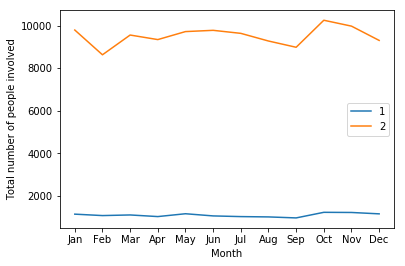

In [34]:
# Total incidents across months
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_array = np.zeros((12,2))

b = 0
for a in months:

    for m in [1,2]:        
        month_array[b,m-1] = (np.sum((df_date['MONTH']== a) & (df_date['PERSONCOUNT'] == m)))
    b = b + 1    
    x = [i for i, _ in enumerate(months)]
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))
plt.xticks(x, months)

plt.plot(x,month_array)
plt.xlabel('Month')
plt.ylabel('Total number of people involved')
plt.legend(['1','2'],loc=5)
plt.show() 

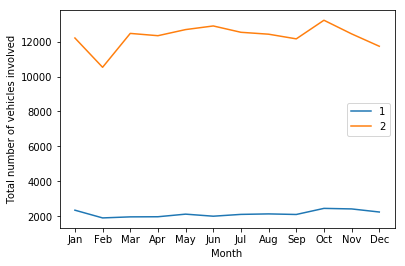

In [35]:
# Total incidents across months
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_array = np.zeros((12,2))

b = 0
for a in months:

    for m in [1,2]:        
        month_array[b,m-1] = (np.sum((df_date['MONTH']== a) & (df_date['VEHCOUNT'] == m)))
    b = b + 1    
    x = [i for i, _ in enumerate(months)]
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))
plt.xticks(x, months)

plt.plot(x,month_array)
plt.xlabel('Month')
plt.ylabel('Total number of vehicles involved')
plt.legend(['1','2'],loc=5)
plt.show()

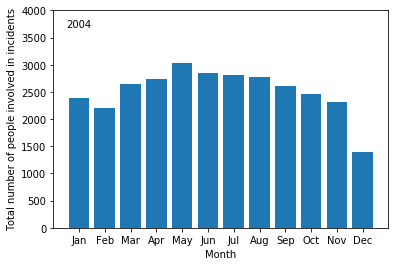

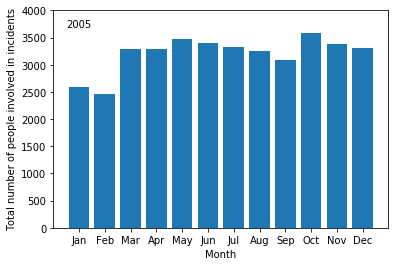

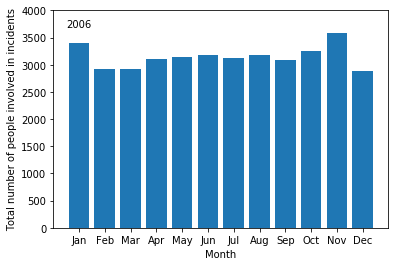

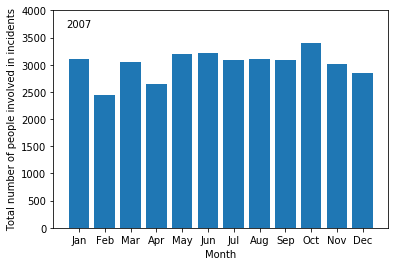

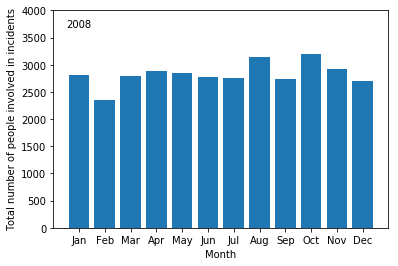

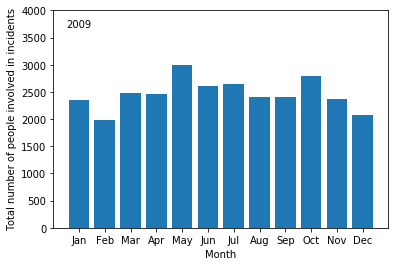

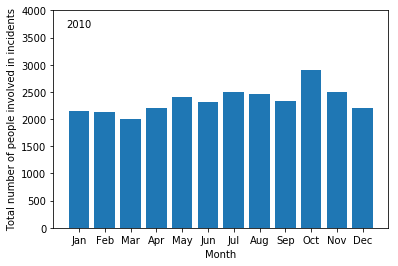

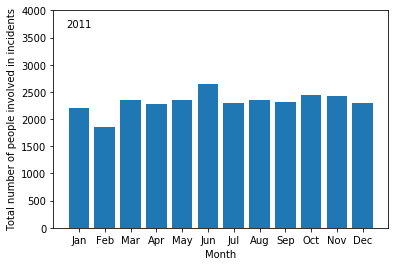

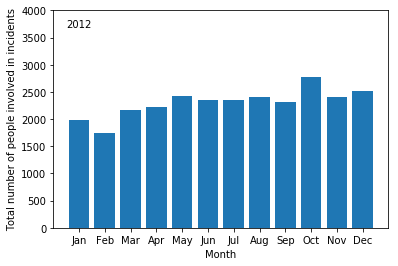

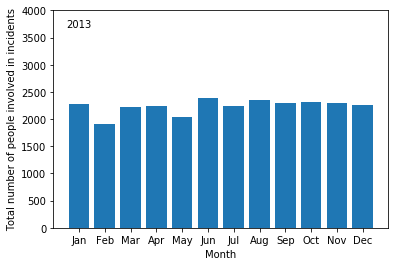

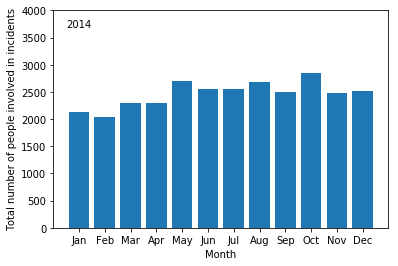

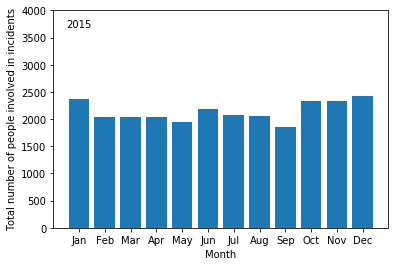

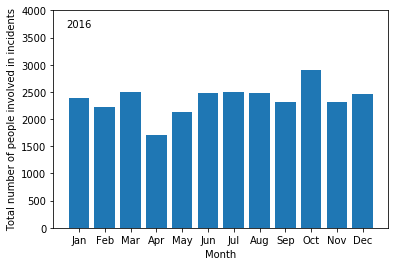

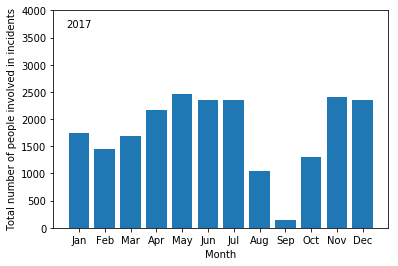

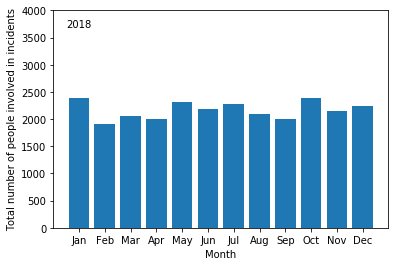

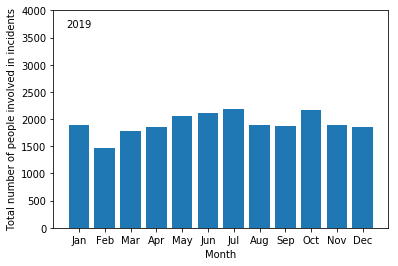

In [33]:
# People involved against month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_array = np.zeros(12)

for b in range(2004,2020,1):
    df_date00 = df_date[df_date['YEAR'] == b] #can change year
    n = 0
    for a in months:
        month_array[n] = np.sum(df_date00['PERSONCOUNT'][df_date00['MONTH'] == a])
        n = n + 1
        x = [i for i, _ in enumerate(months)]
    plt.figure()
    plt.ylim([0,4000])
    plt.text(-0.5,3700,str(b))    
    plt.xticks(x, months)
    plt.xlabel('Month')
    plt.ylabel('Total number of people involved in incidents')
    plt.bar(x,month_array)
plt.show()

### per day

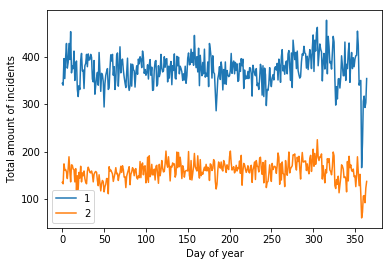

In [9]:
# Total incidents across days
import matplotlib.pyplot as plt
df_date['SEVERITYCODE'].astype(str)
severity_array = np.zeros((2,365))
    
for n in range(365):
    a = 0
    for m in [1,2]:        
        severity_array[a,n] = (np.sum((df_date['DAY_OF_YEAR']== n+1) & (df_date['SEVERITYCODE'] == m)))
        a = a + 1
plt.figure()
#plt.ylim([0,70])
#plt.text(175,65,str(b))
for x in range(2):        
    plt.plot(range(365),severity_array[x])
    plt.xlabel('Day of year')
    plt.ylabel('Total number of incidents')
    plt.legend(['1','2'],loc=3)
plt.show()

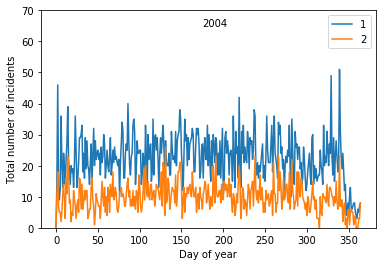

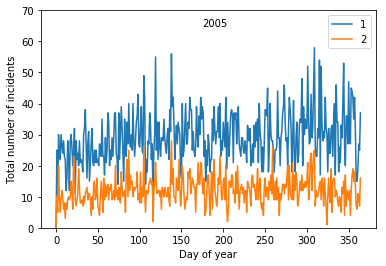

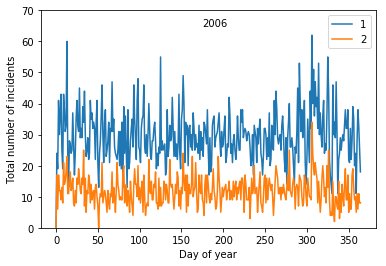

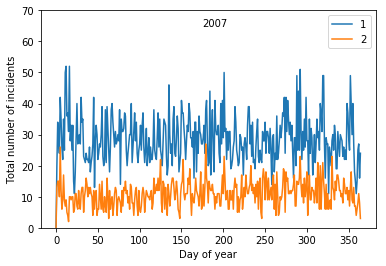

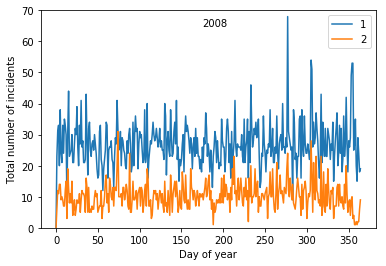

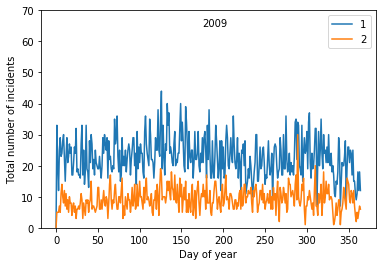

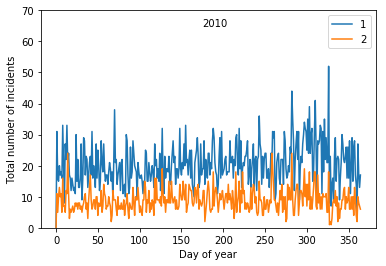

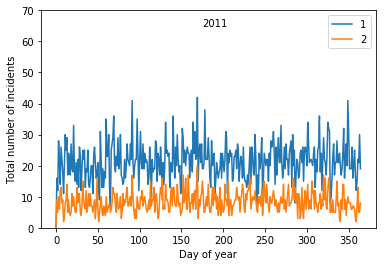

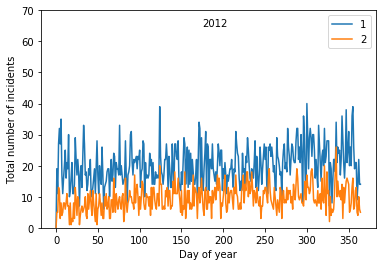

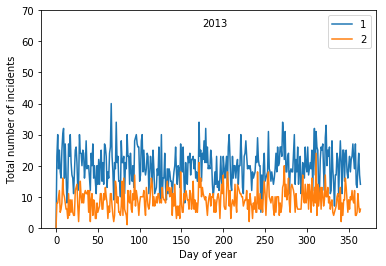

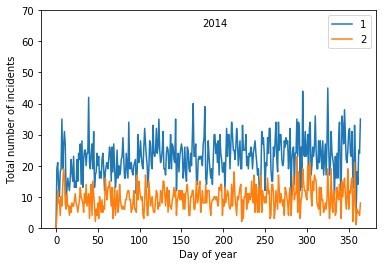

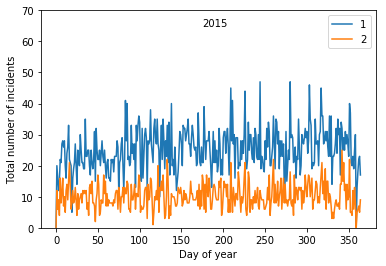

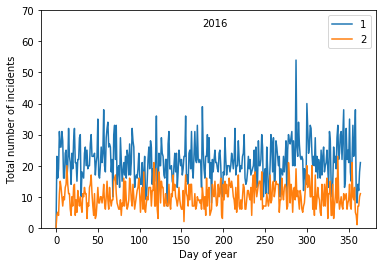

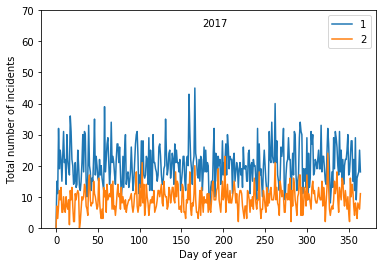

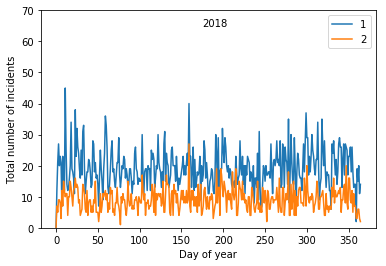

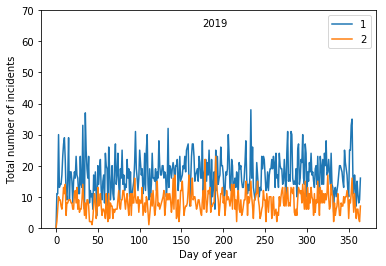

In [36]:
# severity against day each year
import matplotlib.pyplot as plt
df_date['SEVERITYCODE'].astype(str)
for b in range(2004,2020,1):
    df_date00 = df_date[df_date['YEAR'] == b] #can change year
    severity_array = np.zeros((2,365))
    
    for n in range(365):
        a = 0
        for m in [1,2]:        
            severity_array[a,n] = (np.sum((df_date00['DAY_OF_YEAR']==n) & (df_date00['SEVERITYCODE'] == m)))
            a = a + 1
    plt.figure()
    plt.ylim([0,70])
    plt.text(175,65,str(b))
    for x in range(2):        
        plt.plot(range(365),severity_array[x])
        plt.xlabel('Day of year')
        plt.ylabel('Total number of incidents')
    plt.legend(['1','2'],loc=1)
plt.show()
        

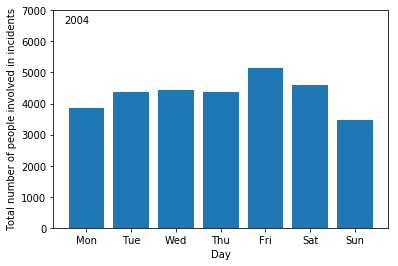

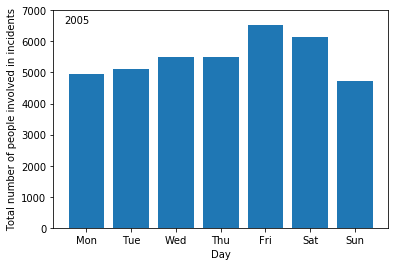

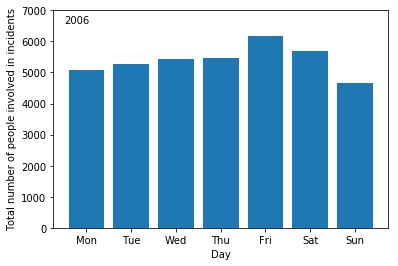

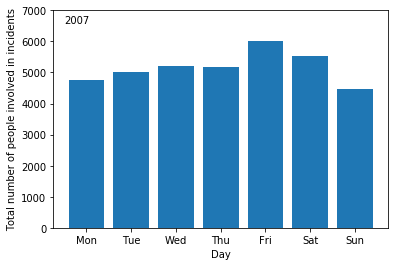

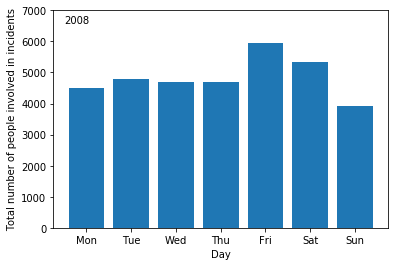

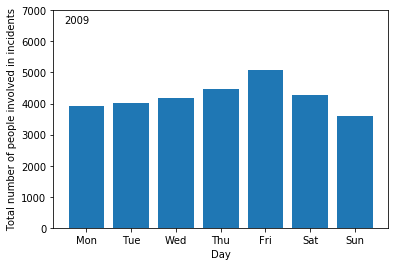

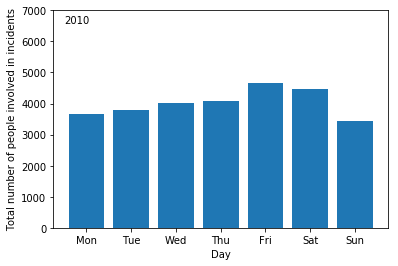

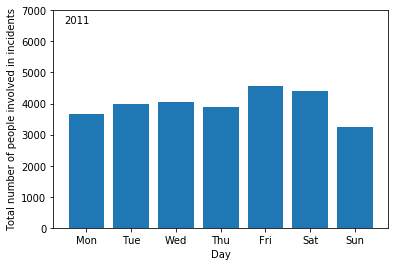

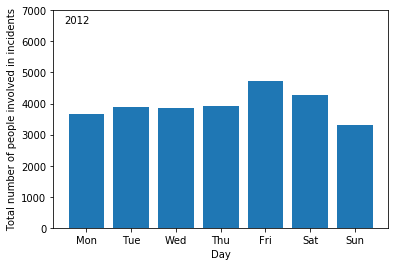

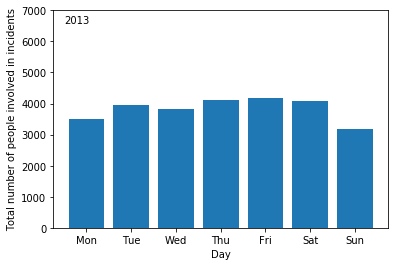

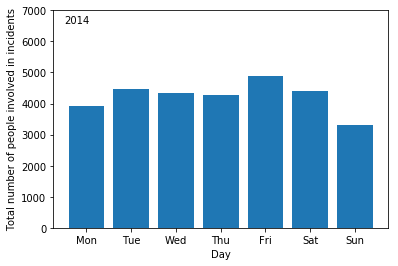

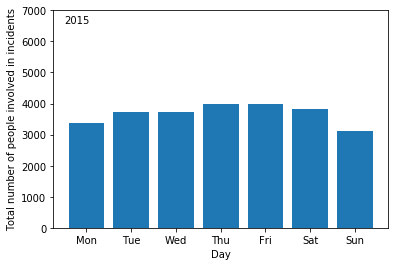

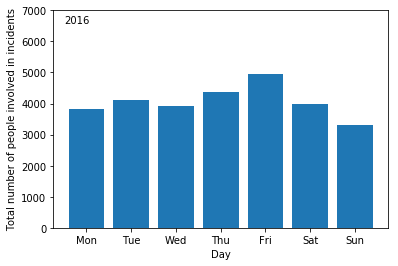

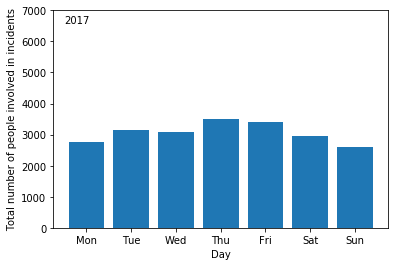

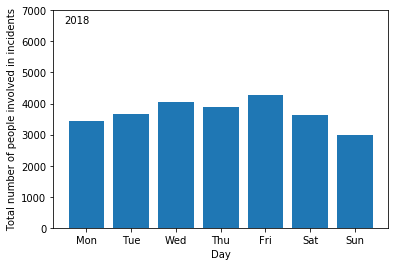

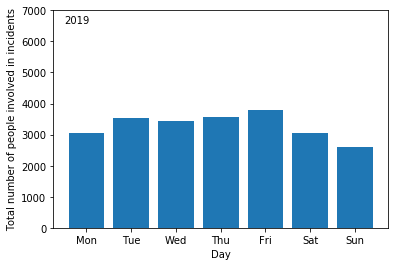

In [23]:
# People involved against day
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
day_array = np.zeros(7)

for b in range(2004,2020,1):
    df_date00 = df_date[df_date['YEAR'] == b] #can change year
    n = 0
    for a in days:
        day_array[n] = np.sum(df_date00['PERSONCOUNT'][df_date00['DAY'] == a])
        n = n + 1
        x = [i for i, _ in enumerate(days)]
    plt.figure()
    plt.ylim([0,7000])
    plt.text(-0.5,6600,str(b))  
    plt.xticks(x, days)
    plt.bar(x,day_array)
    plt.xlabel('Day')
    plt.ylabel('Total number of people involved')
plt.show()  

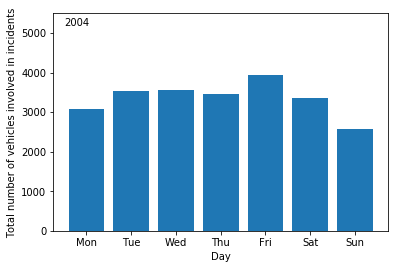

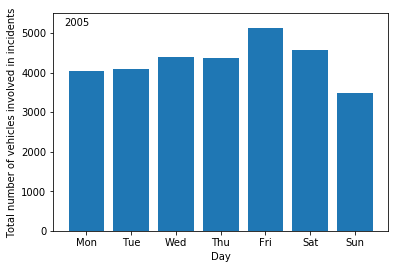

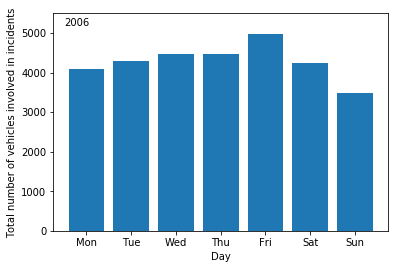

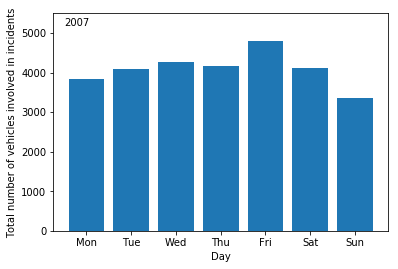

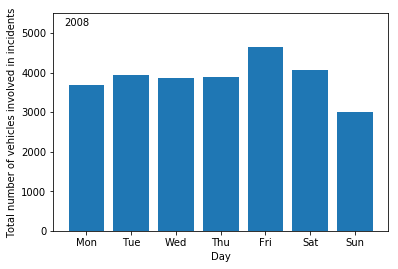

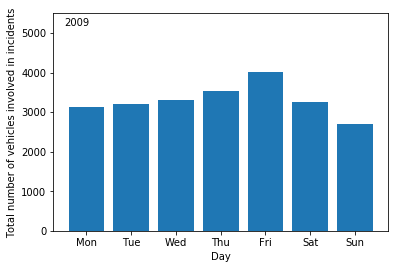

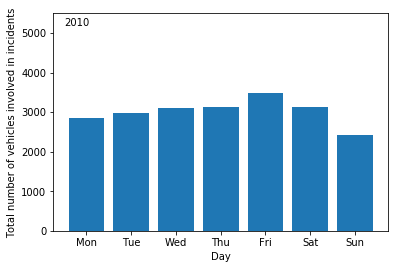

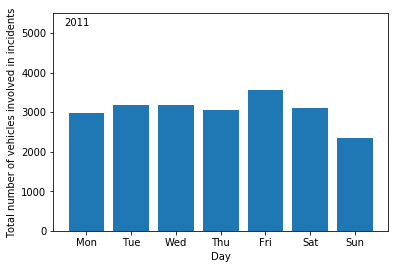

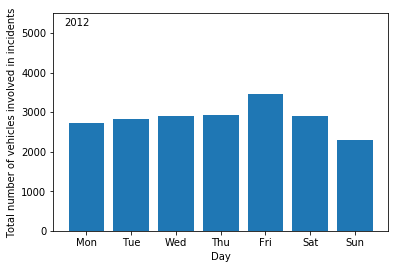

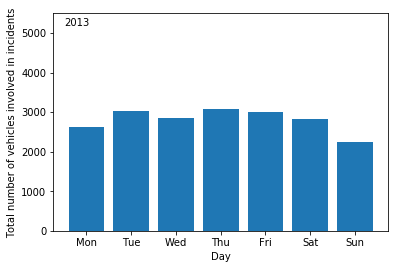

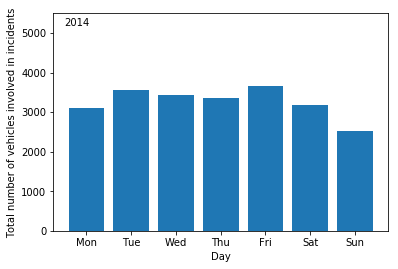

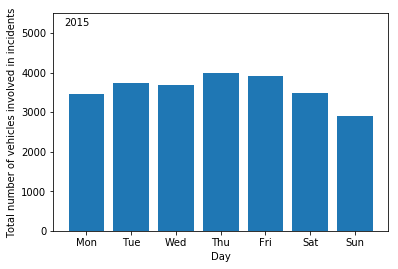

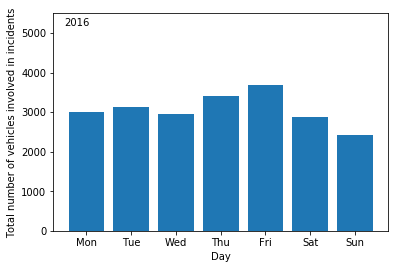

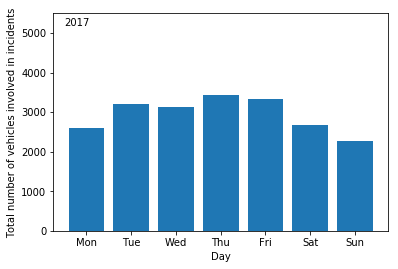

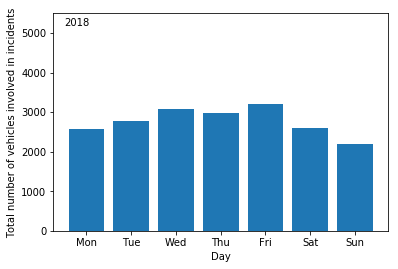

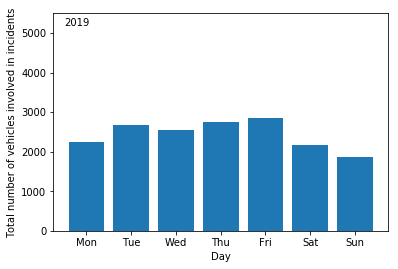

In [24]:
# Vehicles involved against day
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
day_array = np.zeros(7)

for b in range(2004,2020,1):
    df_date00 = df_date[df_date['YEAR'] == b] #can change year
    n = 0
    for a in days:
        day_array[n] = np.sum(df_date00['VEHCOUNT'][df_date00['DAY'] == a])
        n = n + 1
        x = [i for i, _ in enumerate(days)]
    plt.figure()
    plt.ylim([0,5500])
    plt.text(-0.5,5200,str(b))
    plt.xticks(x, days)
    plt.bar(x,day_array)
    plt.xlabel('Day')
    plt.ylabel('Total number of vehicles involved')
plt.show() 

### Time

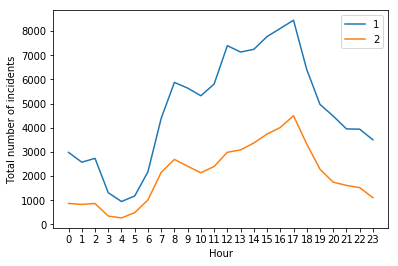

In [42]:
# Total incidents across hour
hour_array = np.zeros((24,2))
times = np.arange(0,24,1)
b = 0
for a in range(0,24):

    for m in [1,2]:        
        hour_array[b,m-1] = (np.sum((df_time['HOUR']== a) & (df_time['SEVERITYCODE'] == m)))
    b = b + 1
    x = [i for i, _ in enumerate(times)]
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))


plt.plot(x,hour_array)
plt.xticks(x, times)
plt.xlabel('Hour')
plt.ylabel('Total number of incidents')
plt.legend(['1','2'],loc=1)
plt.show() 

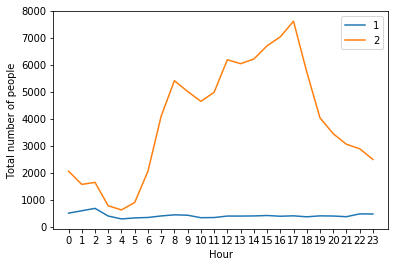

In [12]:
# Total people involved across hour
hour_array = np.zeros((24,2))
times = np.arange(0,24,1)
b = 0
for a in range(0,24):

    for m in [1,2]:        
        hour_array[b,m-1] = (np.sum((df_time['HOUR']== a) & (df_time['PERSONCOUNT'] == m)))
    b = b + 1
    x = [i for i, _ in enumerate(times)]
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))


plt.plot(x,hour_array)
plt.xticks(x, times)
plt.xlabel('Hour')
plt.ylabel('Total number of people')
plt.legend(['1','2'],loc=1)
plt.show() 

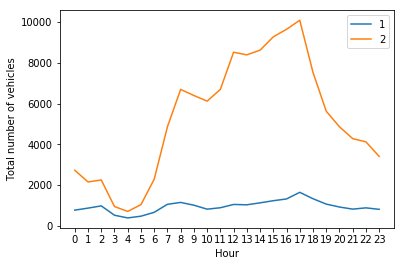

In [13]:
# Total people involved across hour
hour_array = np.zeros((24,2))
times = np.arange(0,24,1)
b = 0
for a in range(0,24):

    for m in [1,2]:        
        hour_array[b,m-1] = (np.sum((df_time['HOUR']== a) & (df_time['VEHCOUNT'] == m)))
    b = b + 1
    x = [i for i, _ in enumerate(times)]
plt.figure()

#plt.ylim([0,7000])
#plt.text(-0.5,6600,str(b))


plt.plot(x,hour_array)
plt.xticks(x, times)
plt.xlabel('Hour')
plt.ylabel('Total number of vehicles')
plt.legend(['1','2'],loc=1)
plt.show()

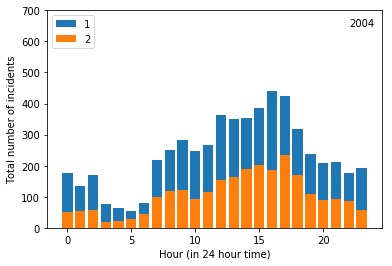

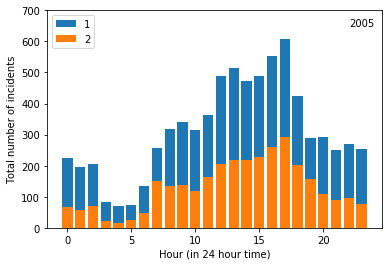

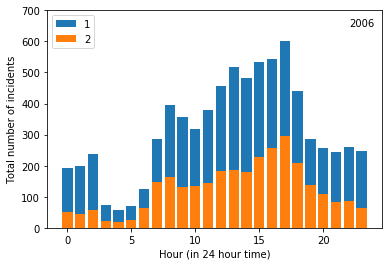

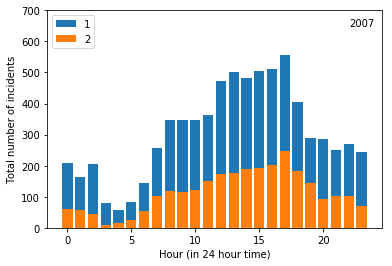

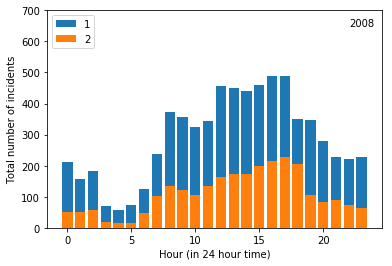

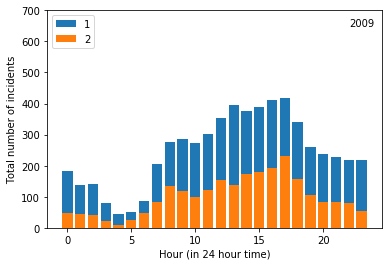

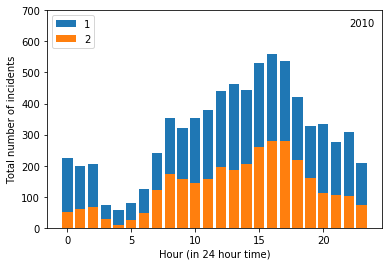

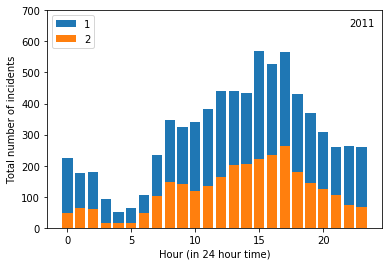

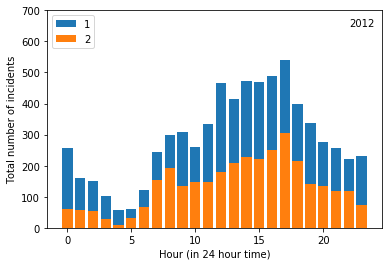

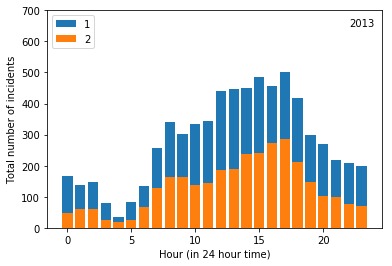

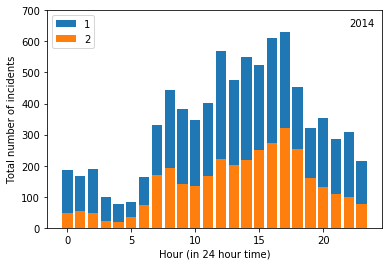

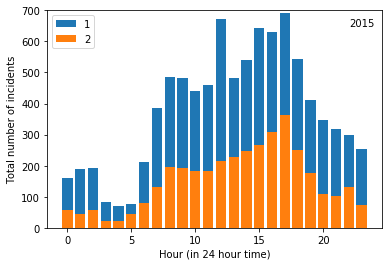

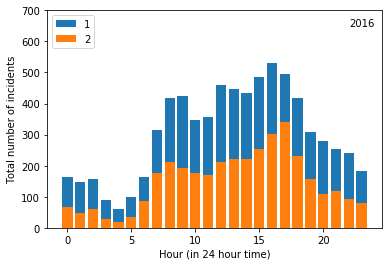

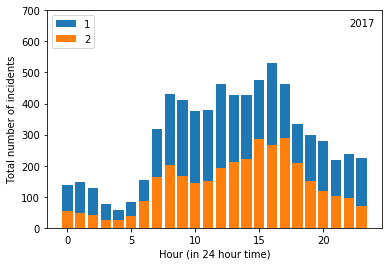

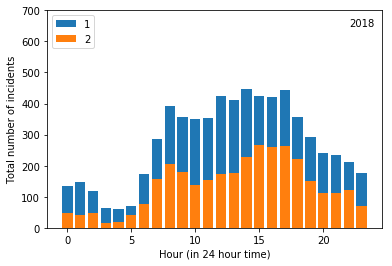

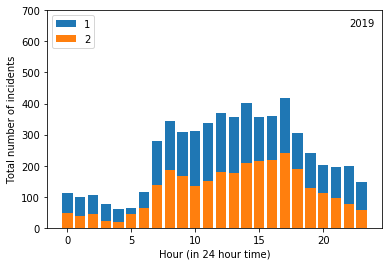

In [37]:
# Incidents involved against hour
df_time['SEVERITYCODE'].astype(str)
for b in range(2004,2020,1):
    df_time00 = df_time[df_time['YEAR'] == b] #can change year
    severity_array = np.zeros((2,24))
    
    for n in range(24):
        a = 0
        for m in [1,2]:        
            severity_array[a,n] = (np.sum((df_time00['HOUR']==n) & (df_time00['SEVERITYCODE'] == m)))
            a = a + 1
    plt.figure()
    plt.ylim([0,700])
    plt.text(22,650,str(b))
    for x in range(2):        
        plt.bar(range(24),severity_array[x])
        plt.xlabel('Hour (in 24 hour time)')
        plt.ylabel('Total number of incidents')
    plt.legend(['1','2'],loc=2)
plt.show()

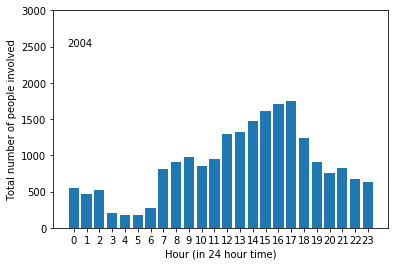

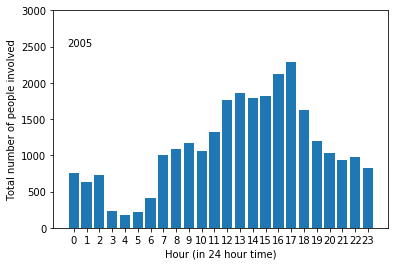

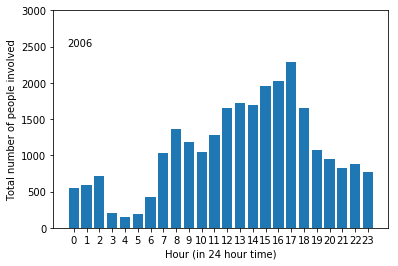

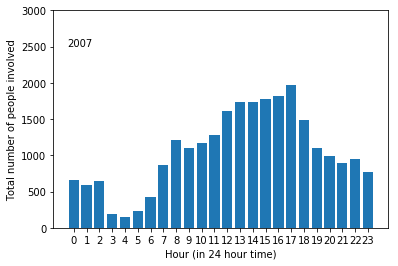

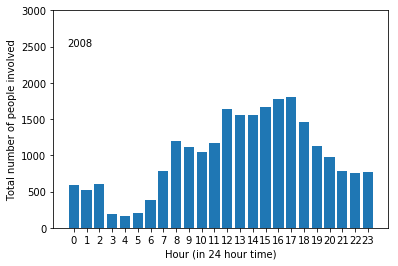

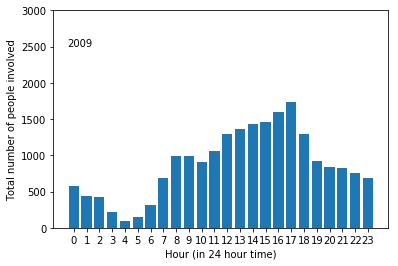

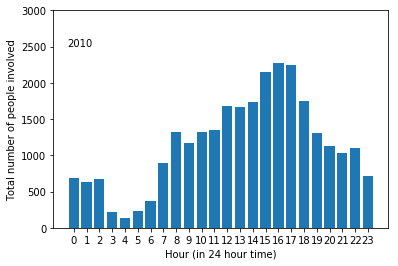

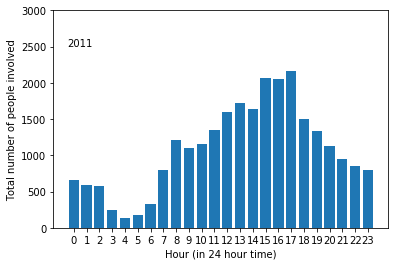

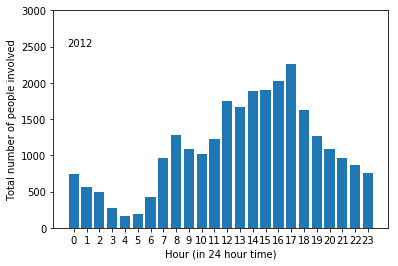

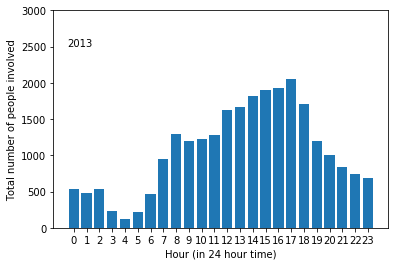

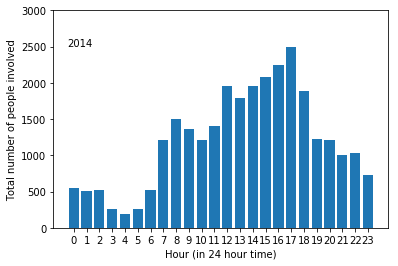

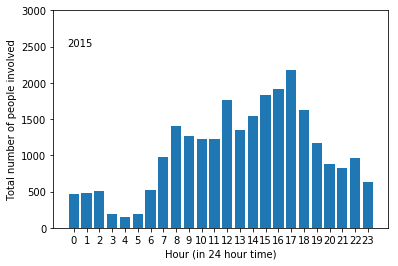

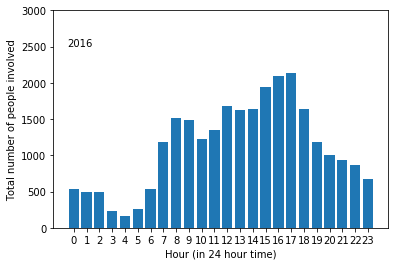

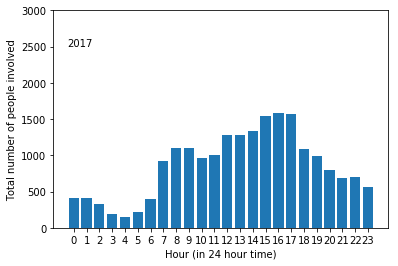

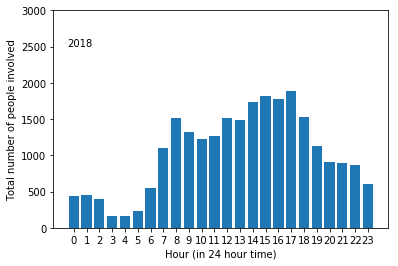

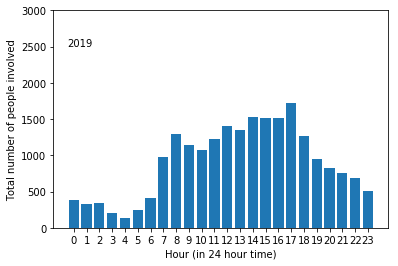

In [44]:
# People involved against time
times = np.arange(0,24,1)
time_array = np.zeros(24)

for b in range(2004,2020,1):
    df_time00 = df_time[df_time['YEAR'] == b] 
    n = 0
    for a in times:
        time_array[n] = np.sum(df_time00['PERSONCOUNT'][df_time00['HOUR'] == a])
        n = n + 1
        x = [i for i, _ in enumerate(times)]
    plt.figure()
    plt.ylim([0,3000])
    plt.text(-0.5,2500,str(b))
    plt.xticks(x, times)
    plt.bar(x,time_array)
    plt.xlabel('Hour (in 24 hour time)')
    plt.ylabel('Total number of people involved')
plt.show()  

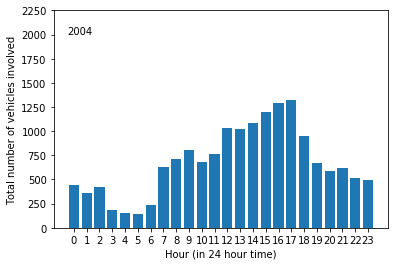

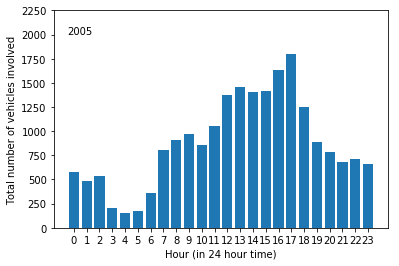

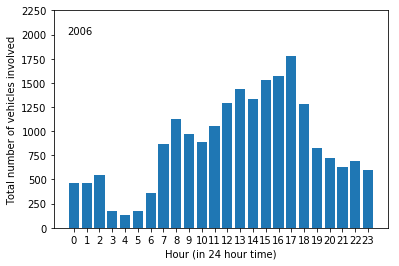

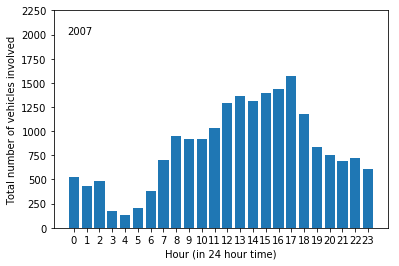

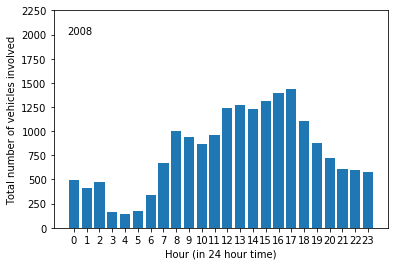

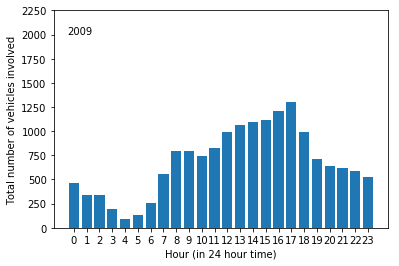

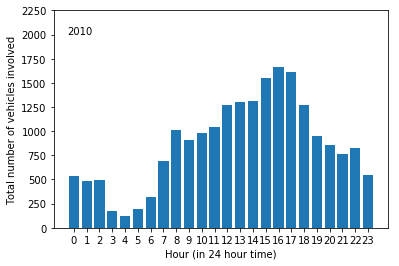

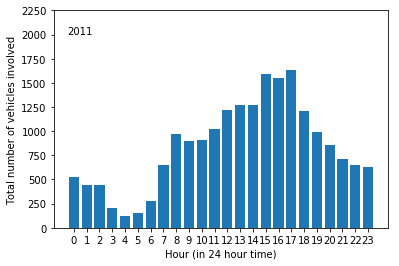

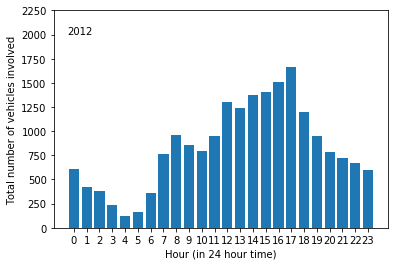

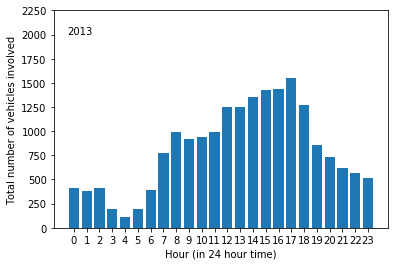

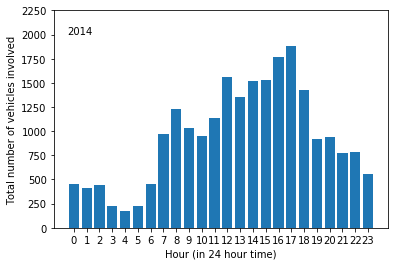

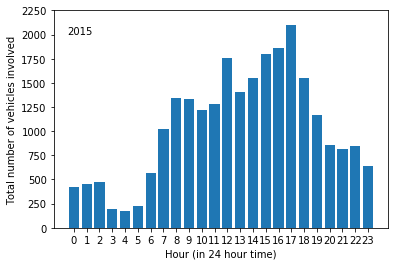

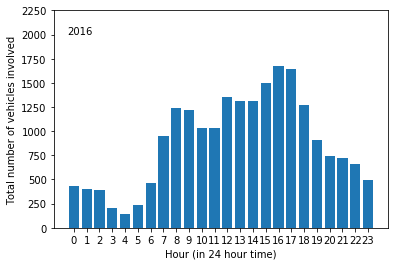

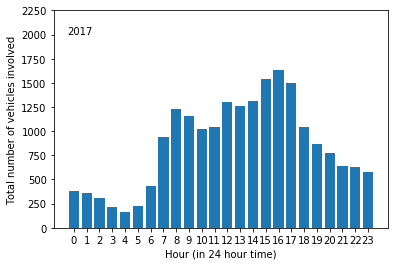

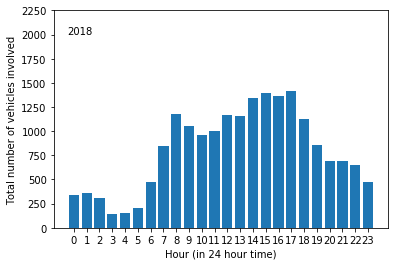

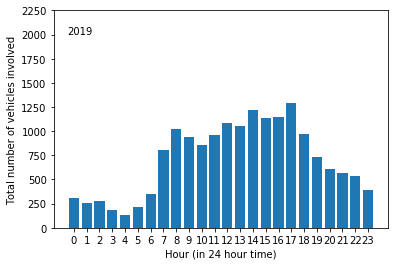

In [45]:
# Vehicles involved against time
import statistics as st
times = np.arange(0,24,1)
time_array = np.zeros(24)

for b in range(2004,2020,1):
    df_time00 = df_time[df_time['YEAR'] == b] 
    n = 0
    for a in times:
        time_array[n] = np.sum(df_time00['VEHCOUNT'][df_time00['HOUR'] == a])
        n = n + 1
        x = [i for i, _ in enumerate(times)]
    plt.figure()
    plt.ylim([0,2250])
    plt.text(-0.5,2000,str(b))
    plt.xticks(x, times)
    plt.bar(x,time_array)
    plt.xlabel('Hour (in 24 hour time)')
    plt.ylabel('Total number of vehicles involved')
plt.show()

## Predictive modeling

### KNN

In [22]:
# need to rerun one hot encoding section first
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
y = df_feature['SEVERITYCODE'].values
x = df_feature.loc[:,df_feature.columns!= 'SEVERITYCODE']
x = preprocessing.StandardScaler().fit(x).transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [23]:
#Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in tqdm(range(1,Ks)):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

100%|██████████| 11/11 [00:38<00:00,  3.96s/it]


array([0.57025037, 0.64100147, 0.59416789, 0.64067747, 0.60980854,
       0.64477172, 0.62235641, 0.64951399, 0.63307806, 0.65134021,
       0.63861561])

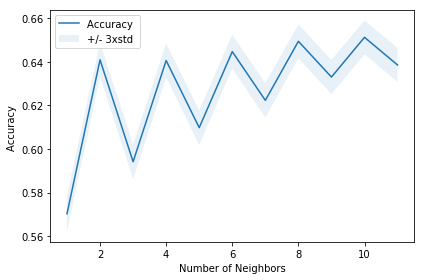

The best accuracy was with 0.651340206185567 with k= 10


In [24]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks), mean_acc - (3 * std_acc), mean_acc + (3 * std_acc), alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(x_train, y_train)

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(x_train, y_train)

#Prediction
predTree = modeltree.predict(x_test)
print(predTree[0:5])
print(y_test[0:5])

names = (list(df_feature.loc[:,df_feature.columns!= 'SEVERITYCODE'].columns))


[1 1 1 1 1]
[1 2 1 2 1]


In [26]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = StringIO()
filename = 'tree.png'
out=tree.export_graphviz(modeltree,feature_names=names, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### SVM

In [27]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
#Predict
yhat = clf.predict(x_test)

#Evaluation
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.5640827389692284

### Logistic Regression

In [ ]:
#Modelling
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(x_train,y_train)

In [ ]:
#Predict
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)

#Evaluation
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

## Model evaluation

In [29]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [30]:
knn_pred=neigh.predict(x_test)
jc1=jaccard_similarity_score(y_test, knn_pred)
fs1=f1_score(y_test, knn_pred, average='weighted')

tree_pred=modeltree.predict(x_test)
jc2=jaccard_similarity_score(y_test, tree_pred)
fs2=f1_score(y_test, tree_pred, average='weighted')

svm_pred=clf.predict(x_test)
jc3=jaccard_similarity_score(y_test, svm_pred)
fs3=f1_score(y_test, svm_pred, average='weighted')



list_jc = [jc1, jc2, jc3]
list_fs = [fs1, fs2, fs3]



import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)

df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score
KNN,0.651340,0.569463
Decision Tree,0.569455,0.571268
SVM,0.563446,0.564083
